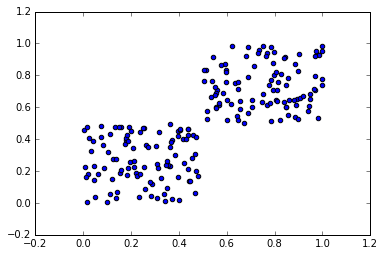

0.0793528774175
[[0.5576421046955967, 0.735330789995857], [0.8753143293771697, 0.5755696572686865], [0.16921804691794995, 0.8725142694571626], [0.3498026099081495, 0.3490767974497686]]
[[0.72152449181126366, 0.72152934810126046], [0.76028331767827706, 0.76028647680715133], [0.27059330718393526, 0.27096342045879257], [0.26146955303654473, 0.26188369044942739]]


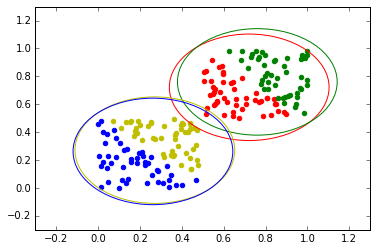

In [1]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

data1=[]
for i in range(100):
	data1=data1+[[0.5+0.5*random.random(),0.5+0.5*random.random()]]
	
data2=[]
for i in range(100):
	data2=data2+[[0.5*random.random(),0.5*random.random()]]

#data3 =[]
#for i in range(30):
#	data3=data3+[[0.8,random.random()]]

data=data1+data2#+data3



datax=[]
for i in range(len(data)):
	datax=datax+[data[i][0]]
	
datay=[]
for i in range(len(data)):
	datay=datay+[data[i][1]]

plt.scatter(datax,datay)
plt.show()


print np.var(data)
	
assign = []
for j in range(4):
	assign=assign+[[random.random(),random.random()]]
print assign




sum=[]
for i in range(len(data)):
	sum=sum+[[]]
r=[]	
for i in range(4):
	r=r+[[]]
	for j in range(len(data)):
		r[i]=r[i]+[[]]
update_assign=[]
for k in range(4):
	update_assign=update_assign+[[]]	
a=0	

b=1/(7*np.var(data1))
while a<10:
	a=a+1 
	sum=[]
	for i in range(len(data)):
		sum=sum+[[]]
	for n in range(len(data)):
		s=0
		for k in range(4):
			s=s+np.exp(-b*(LA.norm(np.array(assign[k])-np.array(data[n]))))
			sum[n]=s
		for j in range(4):
			r[j][n]=np.exp(-b*(LA.norm(np.array(assign[j])-np.array(data[n]))))/s
			#print a,j,n,r[j][n]
	rsum=[]
	for i in range(4):
		rsum=rsum+[[]]
	for k in range(4):
		rs=0
		for n in range(len(data)):
			rs=rs+r[k][n]
			rsum[k]=rs
		ua=[0,0]
		for n in range(len(data)):
			ua[0]=ua[0]+r[k][n]*data[n][0]/float(rs)
			ua[1]=ua[0]+r[k][n]*data[n][1]/float(rs)
			update_assign[k]=ua
			
	assign= update_assign	
	
print assign
c=[[],[],[],[]]
for n in range(len(data)):
	a=[]
	for k in range(4):
		a=a+[r[k][n]]
	i=a.index(max(a))
	c[i]=c[i]+[data[n]]


circle0= plt.Circle(assign[0],1/math.sqrt(b),color='r',fill=False)
circle1= plt.Circle(assign[1],1/math.sqrt(b),color='g',fill=False)
circle2= plt.Circle(assign[2],1/math.sqrt(b),color='y',fill=False)
circle3= plt.Circle(assign[3],1/math.sqrt(b),color='b',fill=False)

fig, ax=plt.subplots()
plt.xlim([-0.3,1.3])
plt.ylim([-0.3,1.3])
ax.add_artist(circle0)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

ax.scatter([x for x,y in c[0]],[y for x,y in c[0]],color='r')
ax.scatter([x for x,y in c[1]],[y for x,y in c[1]],color='g')
ax.scatter([x for x,y in c[2]],[y for x,y in c[2]],color='y')
ax.scatter([x for x,y in c[3]],[y for x,y in c[3]],color='b')


plt.show()
